### Import Library ###

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import glob
from keras.preprocessing import image
from scipy import spatial

## 8.1 Prepare features

### Main images

In [32]:
# Load main image
main_image = cv2.cvtColor(cv2.imread('./assets/images/groupImage.jpg'), cv2.COLOR_BGR2RGB)
print(main_image.shape)

(701, 476, 3)


In [116]:
# Define tile size
tile_size = (20, 20) 
feature_height = int(main_image.shape[0] // tile_size[0])
feature_width = int(main_image.shape[1] // tile_size[1])
print(feature_height, feature_width)

35 23


Text(0.5, 1.0, 'main image feature')

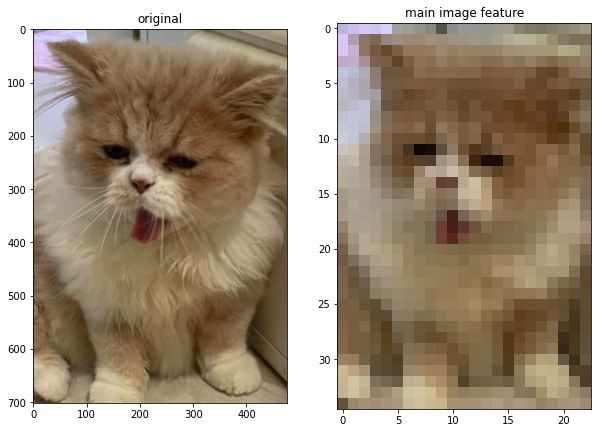

In [53]:
main_image_feature = np.zeros(shape=(feature_height, feature_width, 3), dtype=np.uint8)
# Create main image feature grid of subimage
for i in range(feature_height):
  for j in range(feature_width):
    main_image_feature[i,j] = main_image[i*tile_size[0] : (i+1)*tile_size[0], j*tile_size[1]: (j+1)*tile_size[1]].mean(axis=(0,1))
# Calculate average (mean) color of each subimage with tile_size

plt.figure(figsize=(10,10))
plt.subplot(1,2, 1)
plt.imshow(main_image)
plt.title("original")
plt.subplot(1,2,2)
plt.imshow(main_image_feature)
plt.title("main image feature")

### Tile images

In [54]:
# Collect filenames of all tile images
All_files = glob.glob('./assets/pexels/Background/*.jpg')

In [117]:
# Load tile images and resize to tile_size
tiles=[]
for file in All_files:
  tile = image.load_img(file, target_size=tile_size)
  tiles.append(tile)



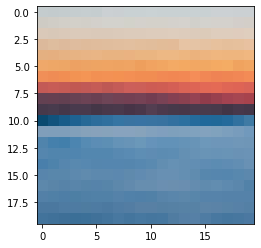

In [118]:
plt.imshow(tiles[0])

In [119]:
# Create array of average (mean) color of each tile image
Tile_features = []
for tile in tiles:
  mean_color = np.array(tile).mean(axis=(0,1))
  Tile_features.append(mean_color)
# print(Tile_features)

## 8.2 Image Clustering and Matching using KNN with KDTree Algorithm ##

In [120]:
#Create KDTree of tile color features
tree = spatial.KDTree(Tile_features)

Text(0.5, 1.0, 'KDTree Return Tile Index')

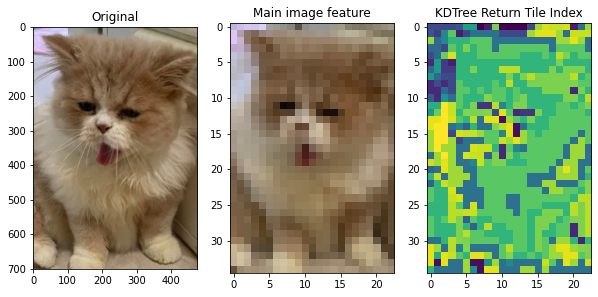

In [122]:
#KNN (k=1) search for best matched tiles with each subimage
closest_tiles = np.zeros((feature_height, feature_width), dtype=np.uint8)
for i in range(feature_height):
  for j in range(feature_width):
    closest = tree.query(main_image_feature[i,j])
    # print(closest[1], type(closest[1]))
    closest_tiles[i, j] = closest[1]

plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(main_image)
plt.title("Original")
plt.subplot(1,3,2)
plt.imshow(main_image_feature)
plt.title("Main image feature")
plt.subplot(1,3,3)
plt.imshow(closest_tiles)
plt.title("KDTree Return Tile Index")

## 8.3 Create Image Mosaic

Text(0.5, 1.0, 'Mosaic')

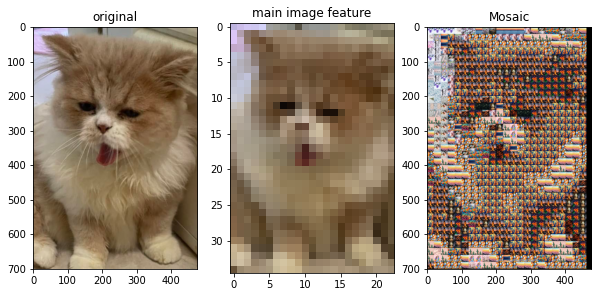

In [123]:
# Fill each subimage with matched tile
main_photo = np.zeros(shape=main_image.shape, dtype=np.uint8)
# print(main_photo)
# Offset of tile
for i in range(feature_height):
  for j in range(feature_width):
    x, y = i*tile_size[0], j*tile_size[1]
    # Index of tile
    index = closest_tiles[i, j]
    main_photo[x:(x+tile_size[0]),y:(y+tile_size[1]),:] = tiles[index]

plt.figure(figsize=(10,10))
plt.subplot(1,3, 1)
plt.imshow(main_image)
plt.title("original")
plt.subplot(1,3,2)
plt.imshow(main_image_feature)
plt.title("main image feature")
plt.subplot(1,3,3)
plt.imshow(main_photo)
plt.title("Mosaic")